## Importing libraries

In [30]:
# Data processing  
# -----------------------------------------------------------------------  
import pandas as pd  
import numpy as np  

# Ignore warnings  
# -----------------------------------------------------------------------  
import warnings  
warnings.filterwarnings("ignore")

# Path configuration for custom module imports  
# -----------------------------------------------------------------------  
import sys  
sys.path.append("../")  # Adds the parent directory to the path for custom module imports  

# Custom functions  
# -----------------------------------------------------------------------  
from src.support_models import ClassificationModels, rows_colors_model

## Data loading

In [31]:
df = pd.read_csv('../data/output/complete_data_preprocessed.csv', index_col=0)

In [32]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,MaritalStatus,MonthlyIncome,...,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0.785714,0.0,0.383349,0.000000,0.178571,0.25,0.251732,0.00,0.090966,0.637546,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.309524,1.0,1.000000,0.046464,0.321429,0.00,0.251732,0.00,1.000000,0.167457,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.333333,0.0,1.000000,0.046464,0.571429,0.75,0.028975,0.75,0.090966,0.964666,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.476190,0.0,0.000000,0.046464,0.035714,1.00,0.251732,0.50,0.090966,0.385045,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.0,0.383349,0.046464,0.321429,0.00,0.254877,0.00,1.000000,0.070195,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Model Selection Criteria

We are evaluating a model that predicts whether an employee will leave the company. In this case, we want to minimize the number of false negatives, i.e., we aim to miss as few positives as possible. False positives are also undesirable, but raising alarms for an employee who is not going to leave while thinking they will is less critical than the opposite.

Therefore, we are particularly interested in the `recall` metric over `precision`. We will also aim to maximize the `f1_score` as much as possible.

Let us recall that the `recall` metric tells us, out of all the **actually** positive cases, how many we have correctly identified.

## Model execution

In [33]:
models = ClassificationModels(df, "Attrition")

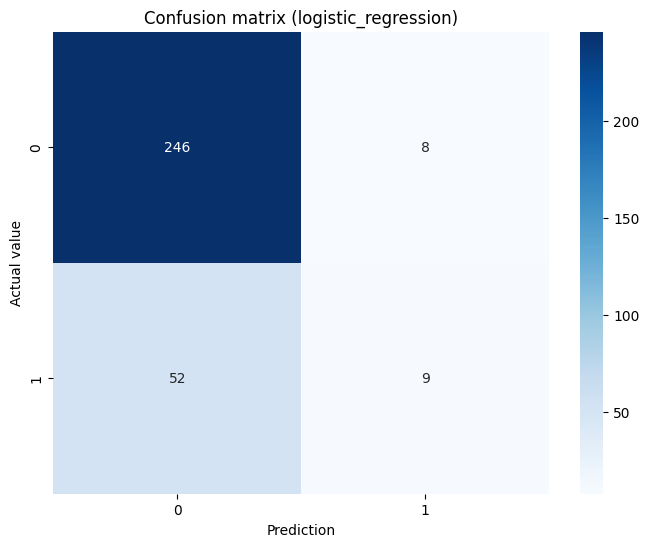

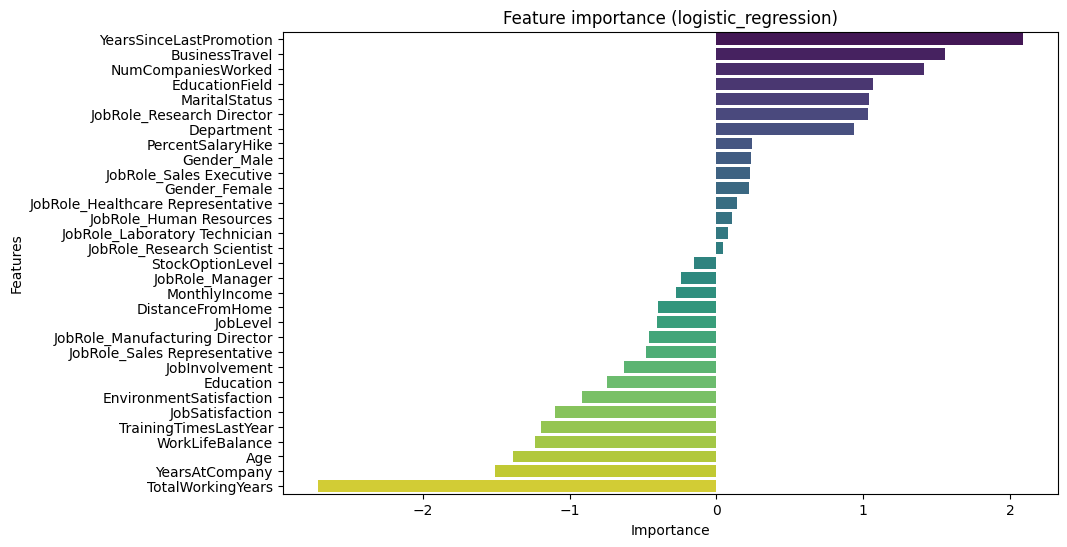

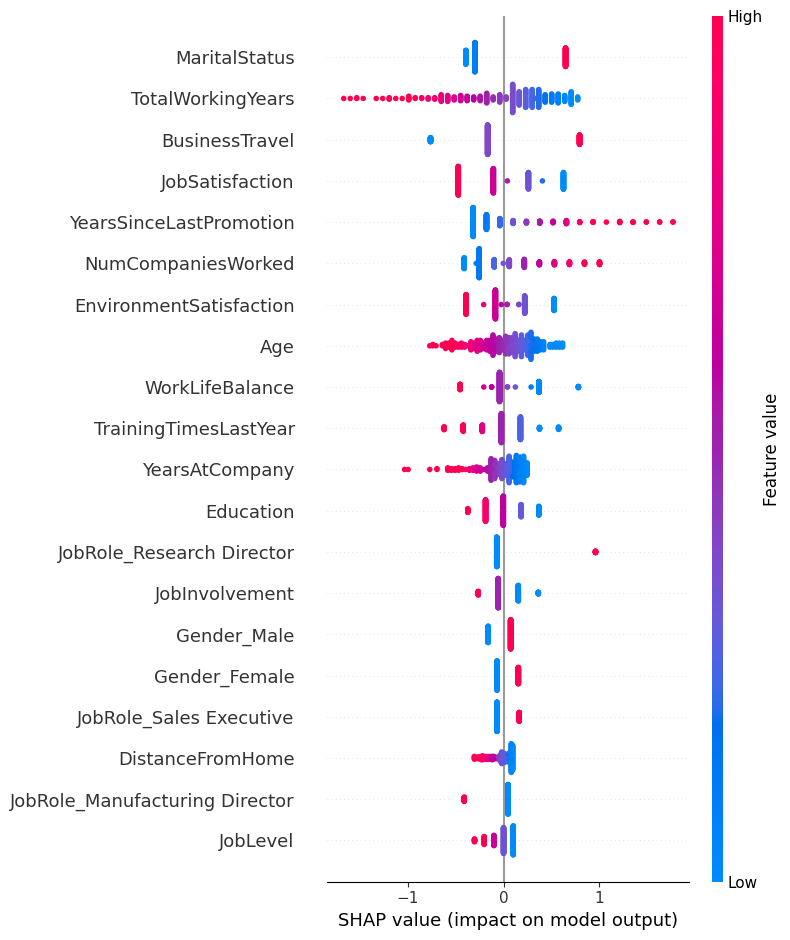

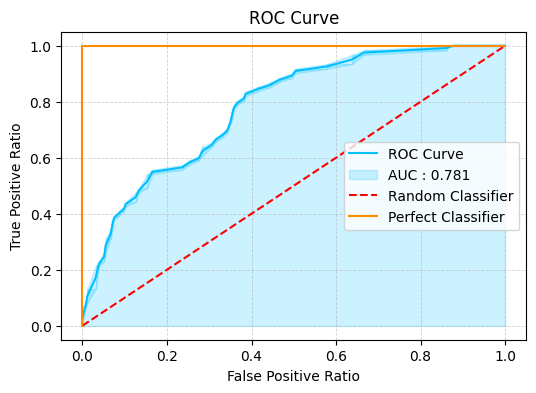

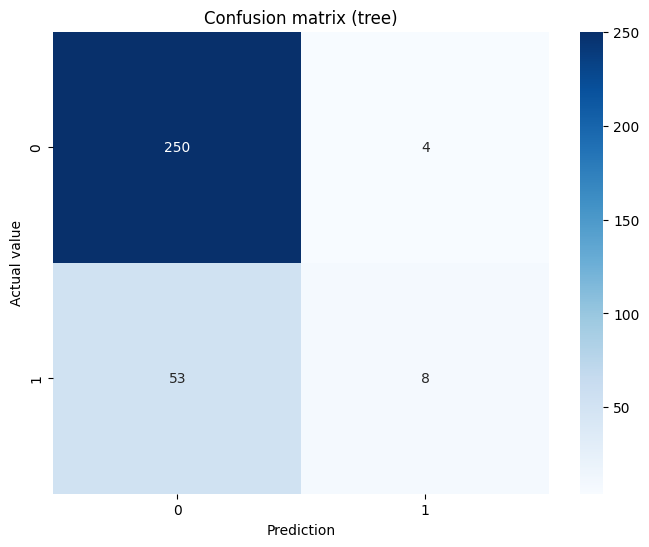

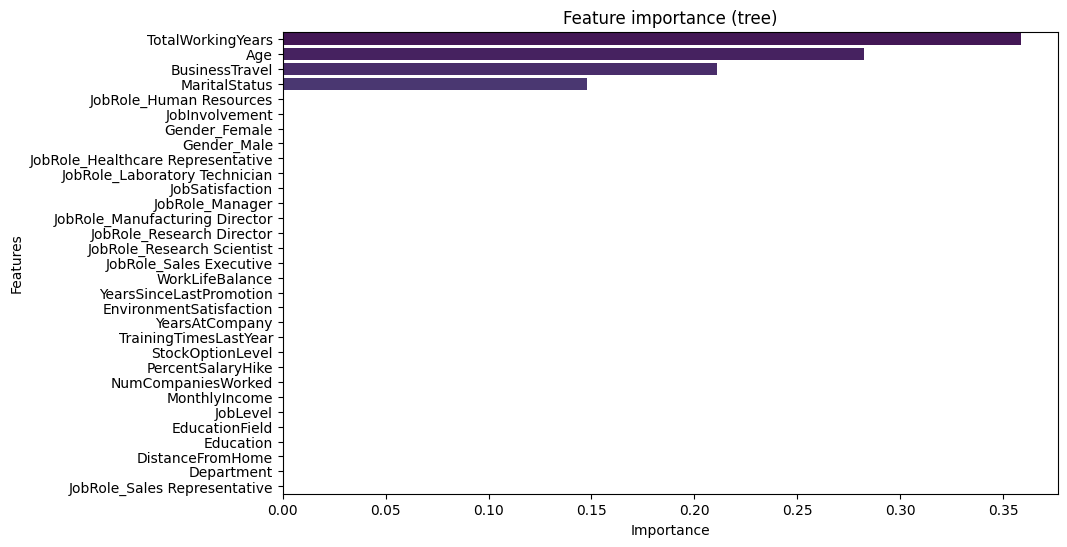

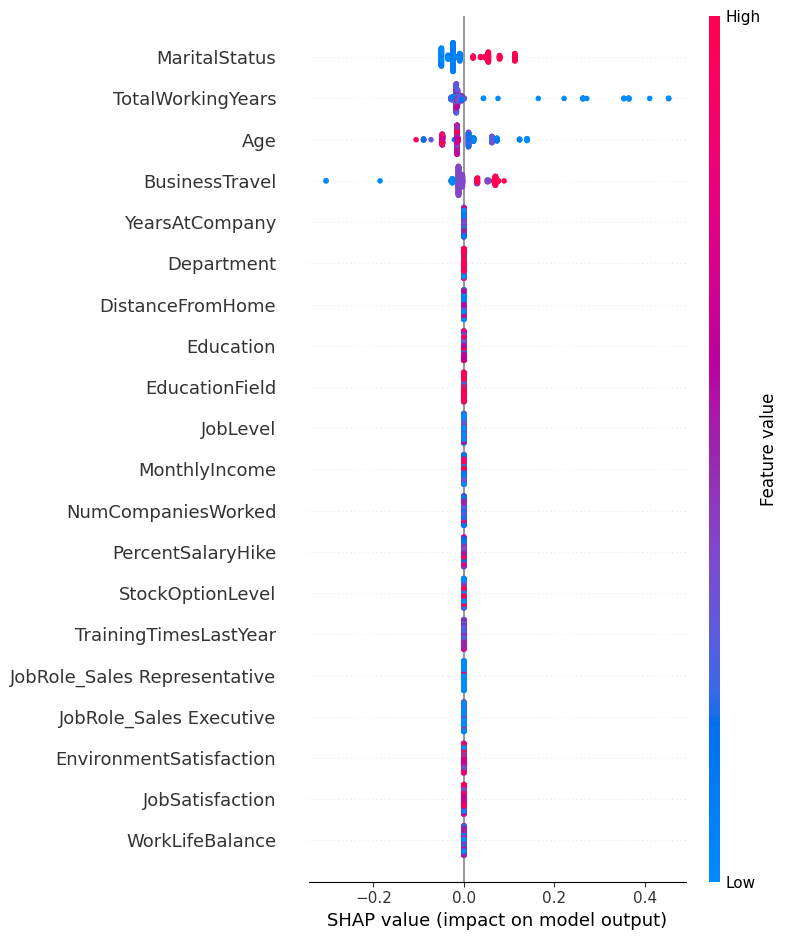

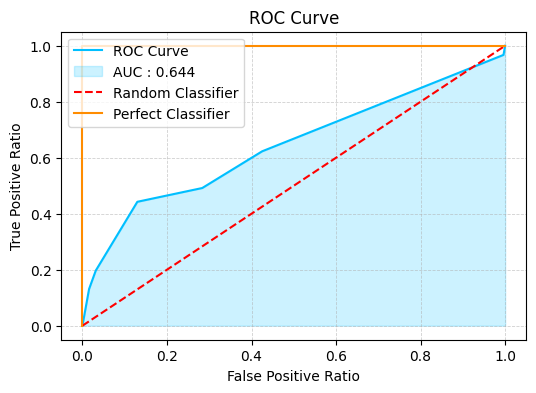

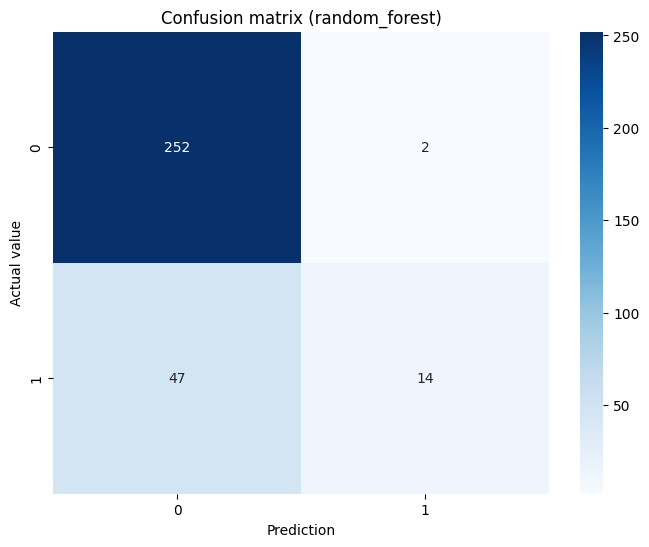

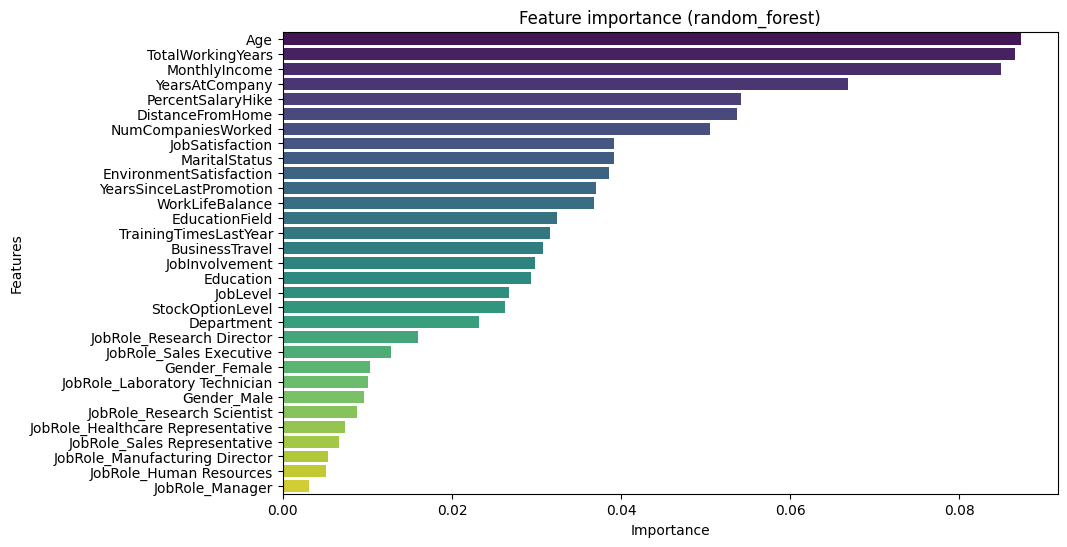

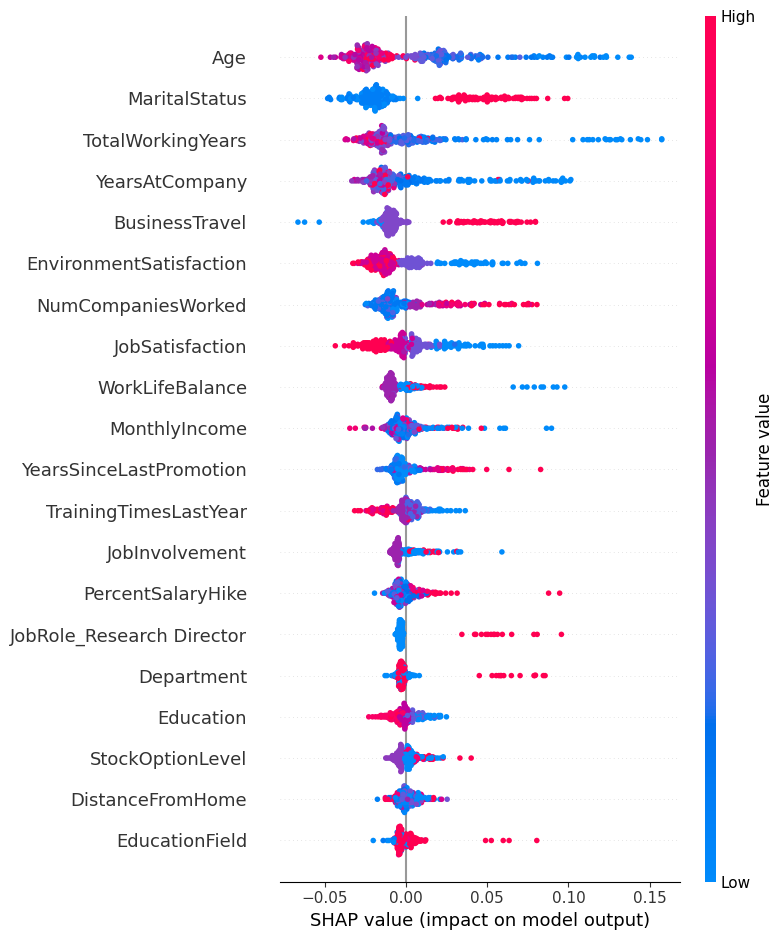

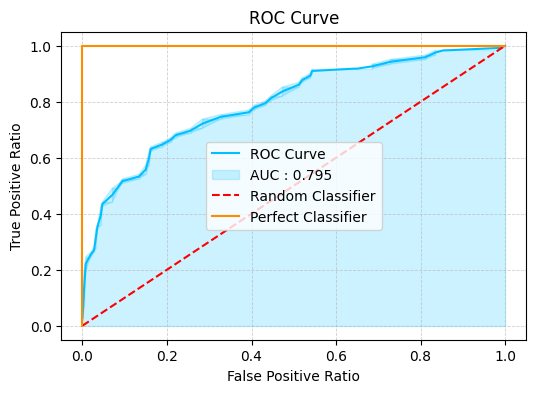

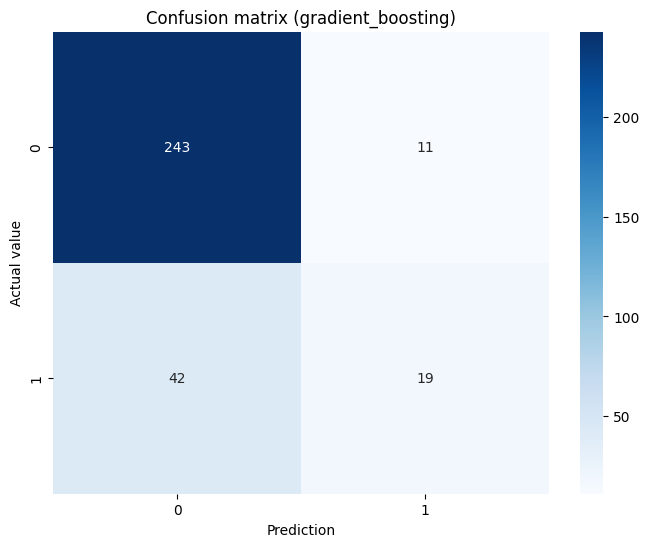

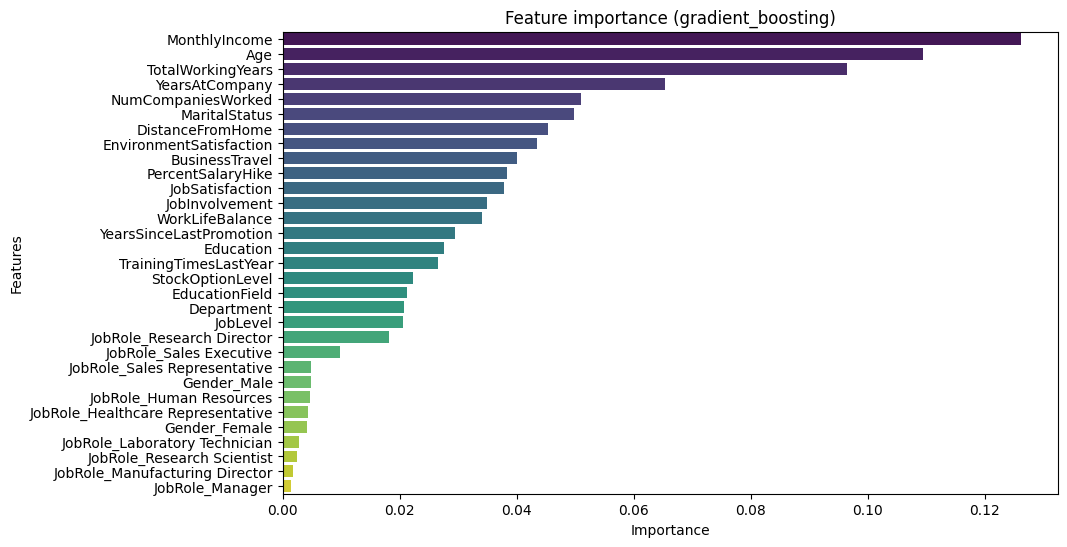

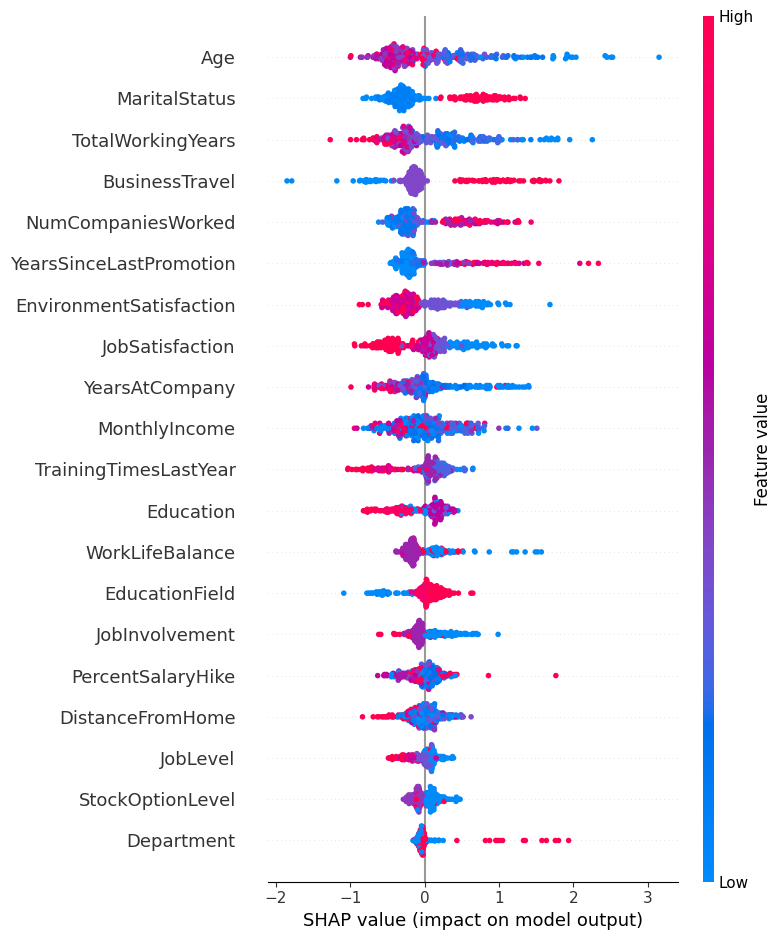

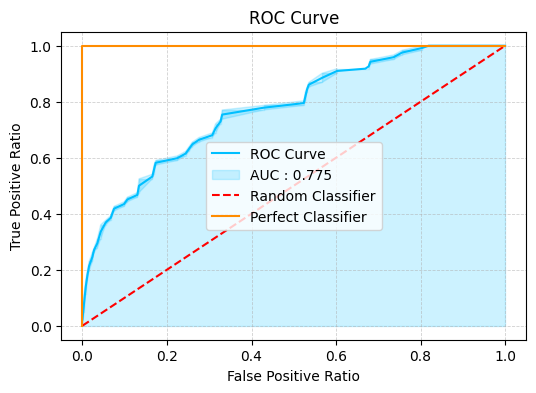

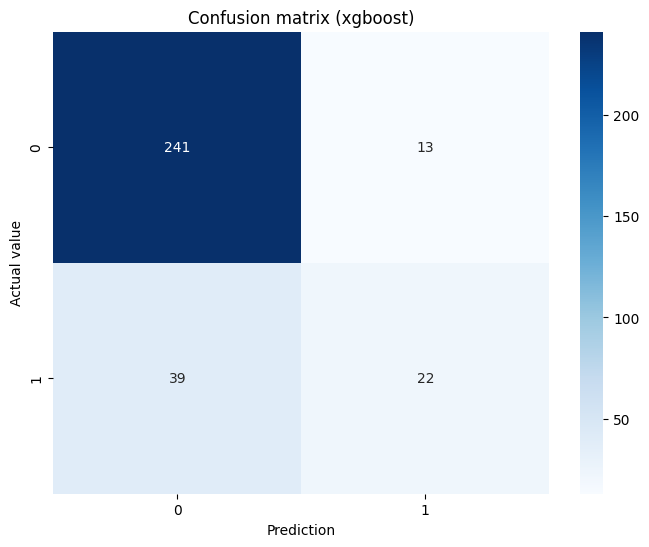

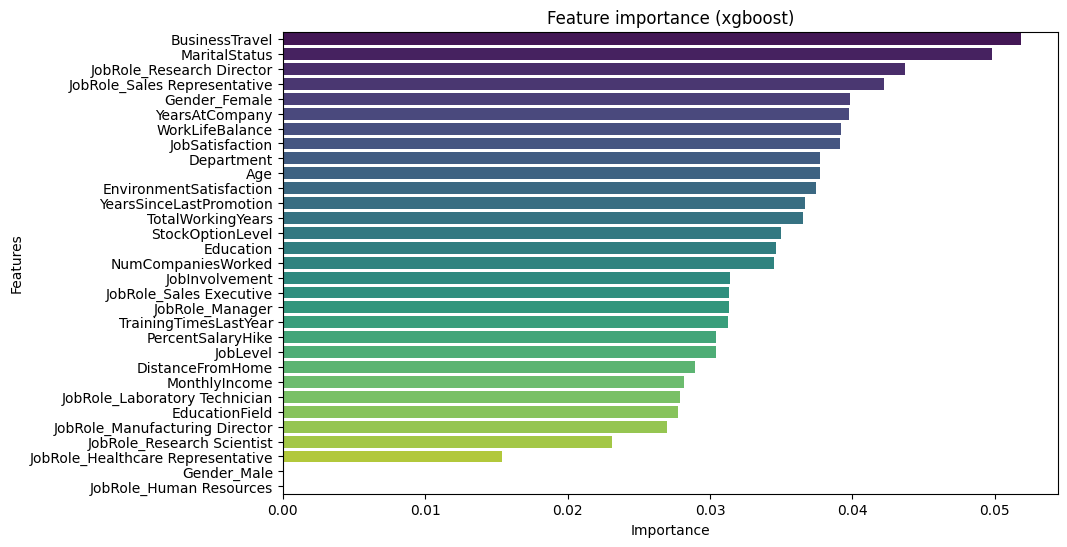

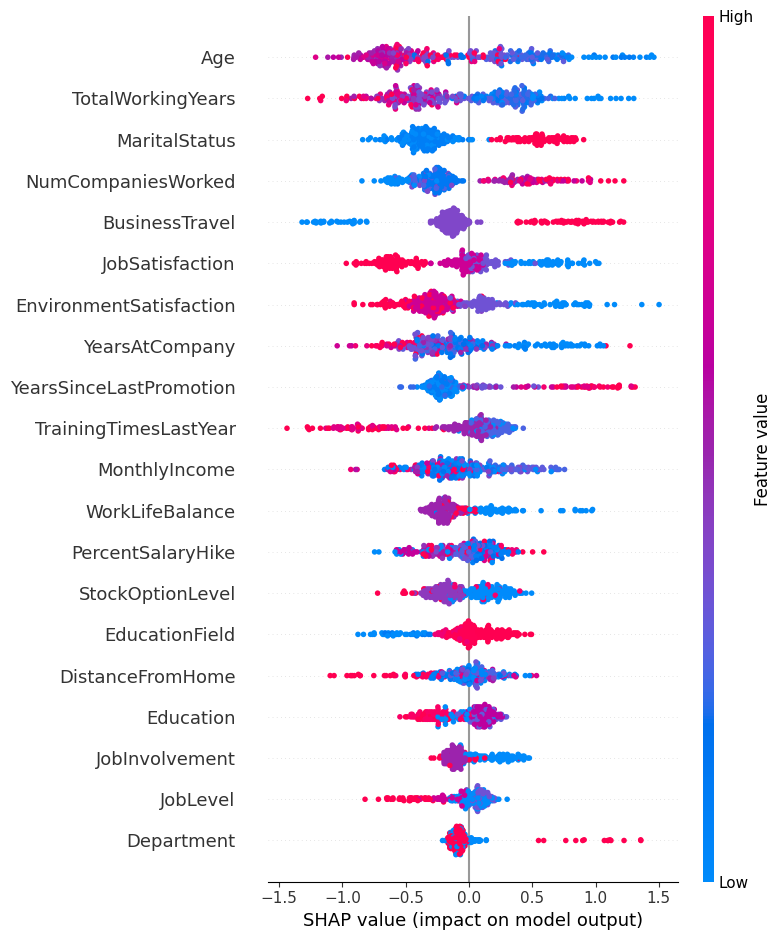

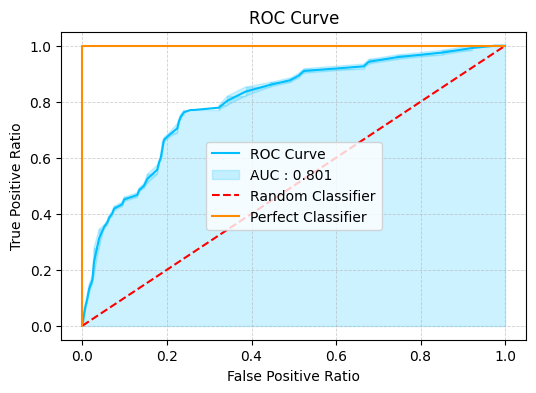

In [34]:
model_list = ["logistic_regression", "tree", "random_forest", "gradient_boosting", "xgboost"]
df_results = pd.DataFrame()

for model in model_list:

    models.fit_model(model, file_name=model)
    models.plot_confusion_matrix(model)
    models.plot_predictors_importance(model)
    models.plot_shap_summary(model)
    df_current_results = models.get_metrics(model)
    df_current_results["model"] = model
    df_results = pd.concat([df_results, df_current_results], axis = 0)
    models.plot_roc_curve(model)

In [35]:
df_results_colors = df_results.copy()
df_results_colors.reset_index(inplace = True, drop = True)
df_results_colors = df_results_colors.style.apply(rows_colors_model, axis=1)
df_results_colors

,accuracy,precision,recall,f1,kappa,auc,time_seconds,cores,model
0,0.862480,0.840650,0.862480,0.827353,0.238589,0.796180,3.082240,nan,logistic_regression
1,0.809524,0.768165,0.809524,0.763391,0.159851,0.780560,3.082240,nan,logistic_regression
2,0.860095,0.846720,0.860095,0.813521,0.166643,0.699017,0.588124,11.000000,tree
3,0.819048,0.794405,0.819048,0.766276,0.166086,0.643572,0.588124,11.000000,tree
4,0.982512,0.982865,0.982512,0.982067,0.928729,1.000000,84.178871,nan,random_forest
5,0.844444,0.849043,0.844444,0.805319,0.307941,0.795211,84.178871,nan,random_forest
6,0.998410,0.998413,0.998410,0.998407,0.993801,1.000000,349.457148,11.000000,gradient_boosting
7,0.831746,0.810164,0.831746,0.807926,0.332334,0.775461,349.457148,11.000000,gradient_boosting
8,0.991256,0.991345,0.991256,0.991149,0.965227,0.999818,139.535627,nan,xgboost
9,0.834921,0.815760,0.834921,0.816585,0.369272,0.801342,139.535627,nan,xgboost


The model with the best `recall` is the `random_forest`, although all of them are quite similar. Due to computation time and overall metrics, we will stick with this model.

There is significant disparity in the importance of features across models, although all of them show that `Age` and `TotalWorkingYears` play an important role. This may lead us to conclude the importance of retaining younger employees compared to more senior ones, who are likely less inclined to change jobs in search of job stability.

Salary and satisfaction also seem to play an important role, which is to be expected.

We also observe that, in general, there is a bit of overfitting, which we could try to reduce by adding more data if possible or by attempting to reduce the number of predictor variables. Next, we will proceed to build a model that handles data preprocessing differently so that we have a smaller number of columns.

---

## Preproceso alternativo

Cargamos el dataframe con un preproceso diferente, en esta caso hemos utilizado solo target encoding

In [36]:
df_2 = pd.read_csv('../data/output/complete_data_preprocessed_2.csv', index_col=0)

In [37]:
models_2 = ClassificationModels(df_2, "Attrition")

In [46]:
df_results_colors_2 = df_results_2.copy()
df_results_colors_2.reset_index(inplace = True, drop = True)
df_results_colors_2 = df_results_colors_2.style.apply(rows_colors_model, axis=1)
df_results_colors_2

,accuracy,precision,recall,f1,kappa,auc,time_seconds,cores,model
0,0.860095,0.838259,0.860095,0.819462,0.198361,0.791474,1.950668,nan,logistic_regression
1,0.815873,0.784007,0.815873,0.764104,0.158995,0.788305,1.950668,nan,logistic_regression
2,0.860095,0.846720,0.860095,0.813521,0.166643,0.699017,0.612723,11.000000,tree
3,0.819048,0.794405,0.819048,0.766276,0.166086,0.643572,0.612723,11.000000,tree
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,96.717018,nan,random_forest
5,0.844444,0.849043,0.844444,0.805319,0.307941,0.793888,96.717018,nan,random_forest
6,0.930048,0.933789,0.930048,0.921513,0.668561,0.968773,368.006836,11.000000,gradient_boosting
7,0.838095,0.820439,0.838095,0.810746,0.337061,0.780367,368.006836,11.000000,gradient_boosting
8,0.953895,0.955825,0.953895,0.950525,0.796496,0.991035,140.736148,nan,xgboost
9,0.844444,0.832436,0.844444,0.815869,0.352749,0.789919,140.736148,nan,xgboost


Using a preprocessing approach that performs encoding using only the target and again a min-max scaler, we obtain slightly better models in terms of metrics, though without a significant difference. 

The metrics hardly change, so we will maintain the previous approach.

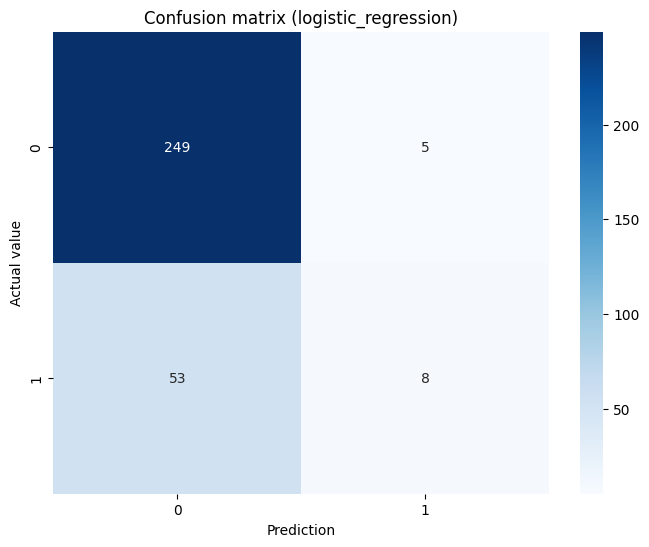

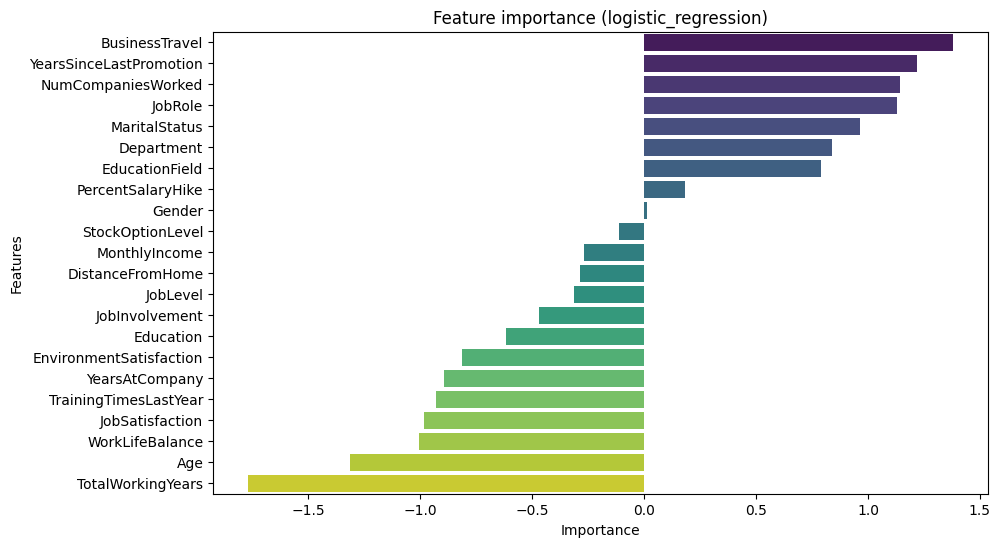

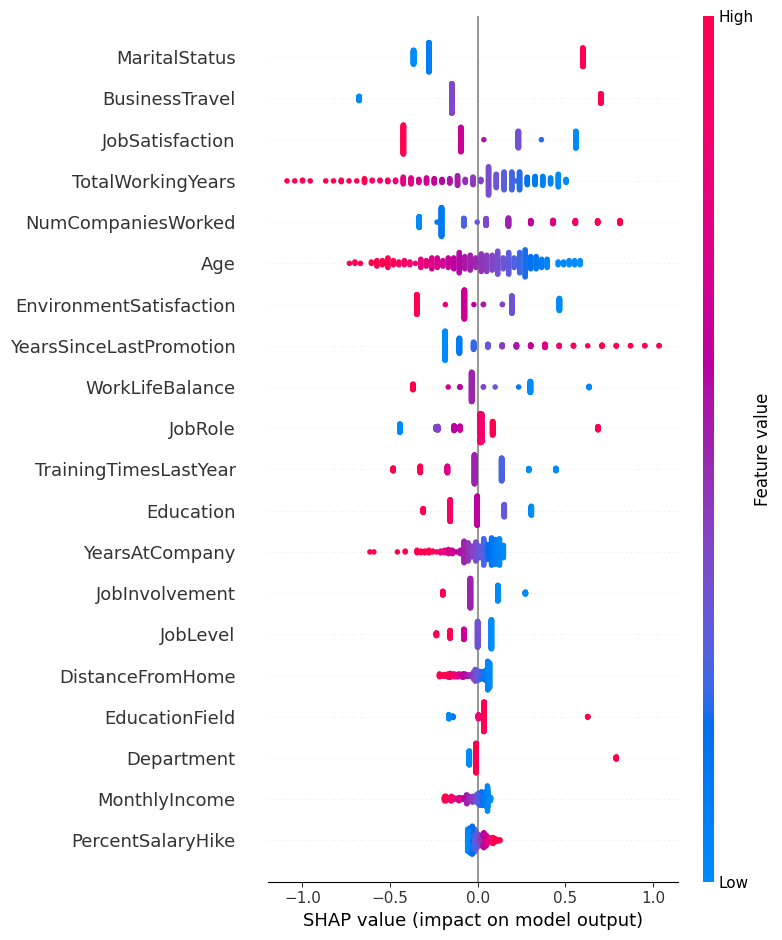

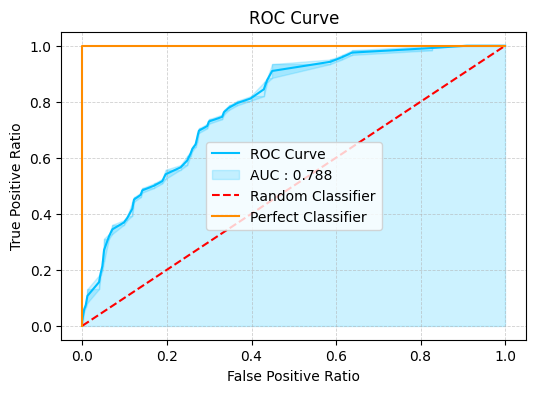

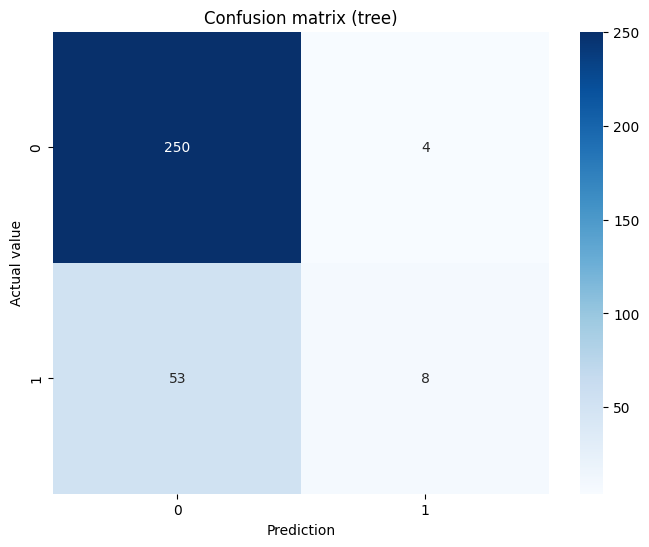

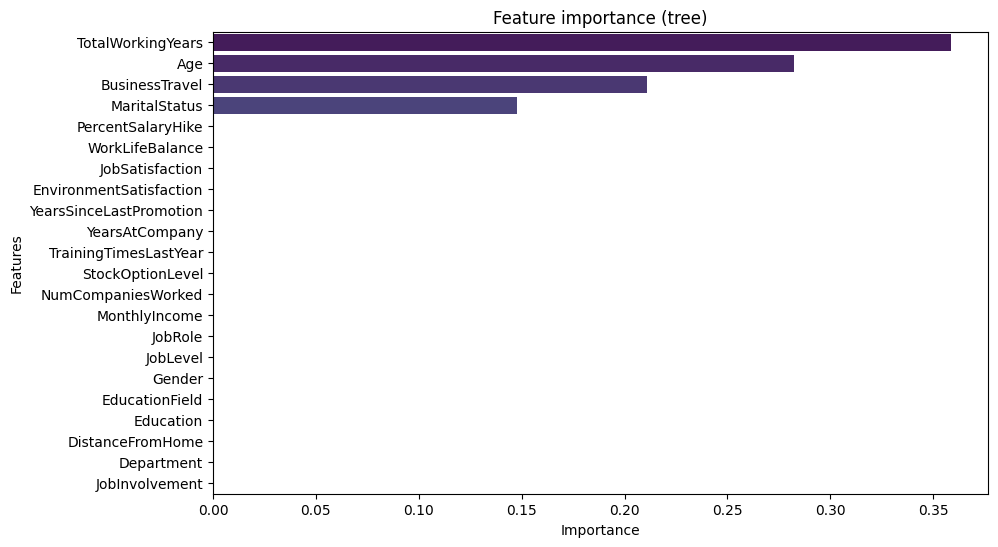

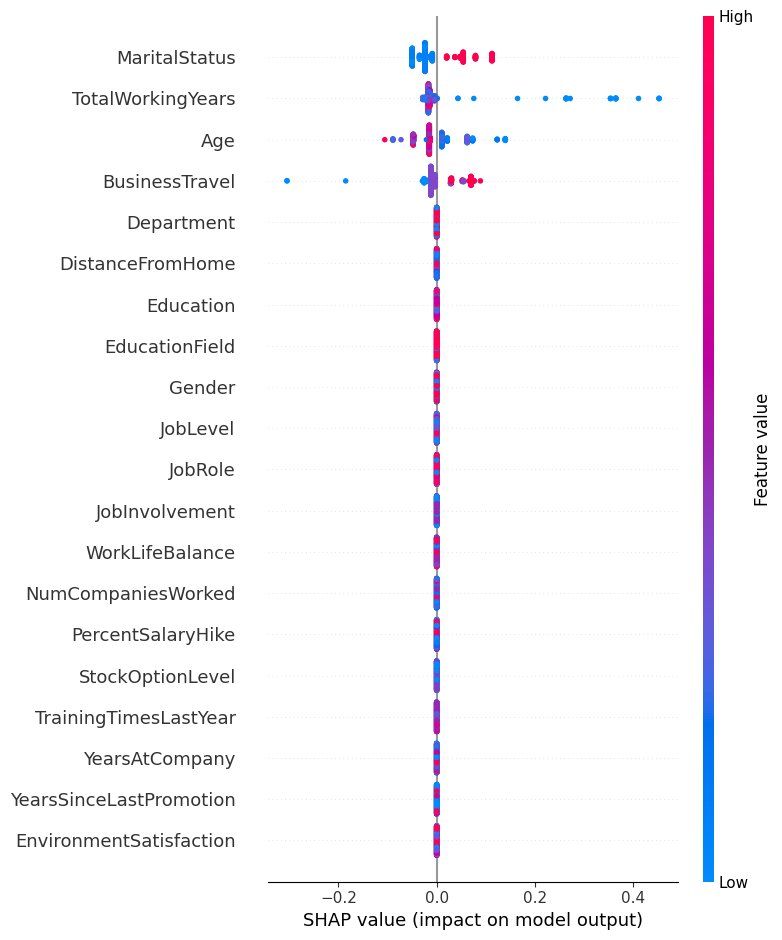

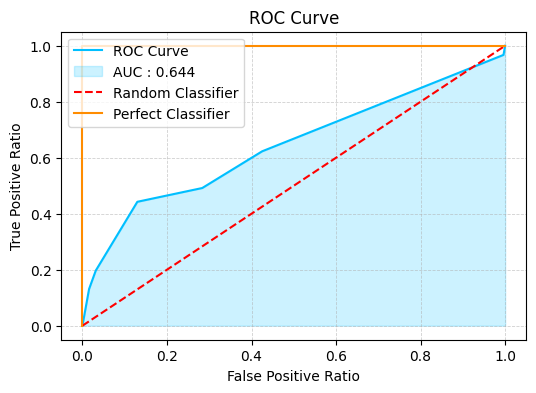

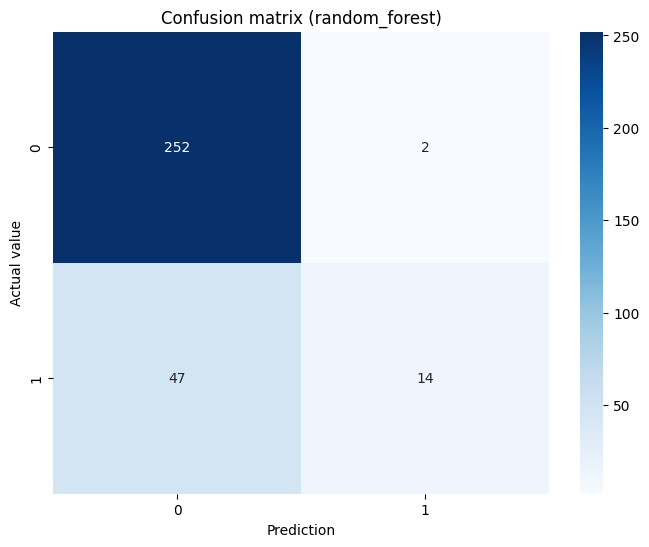

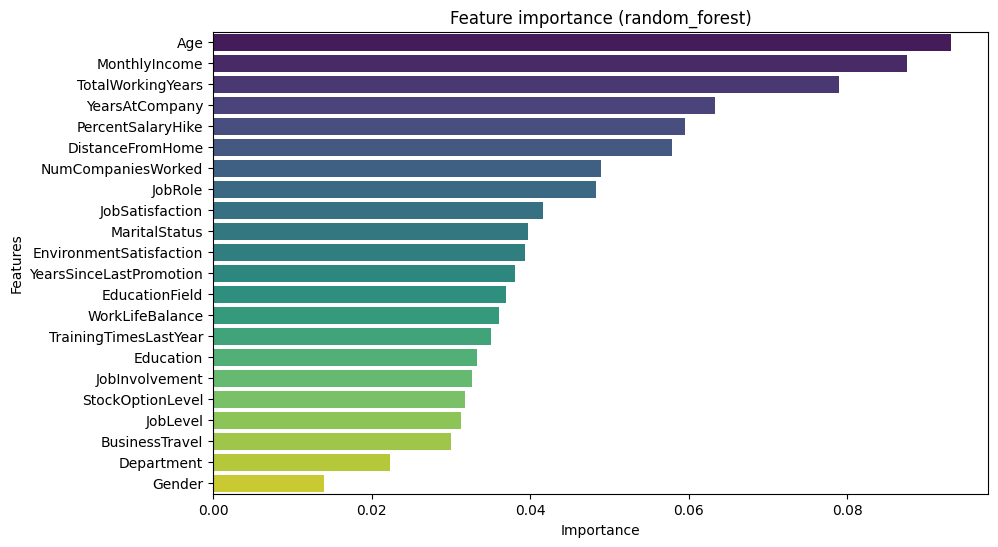

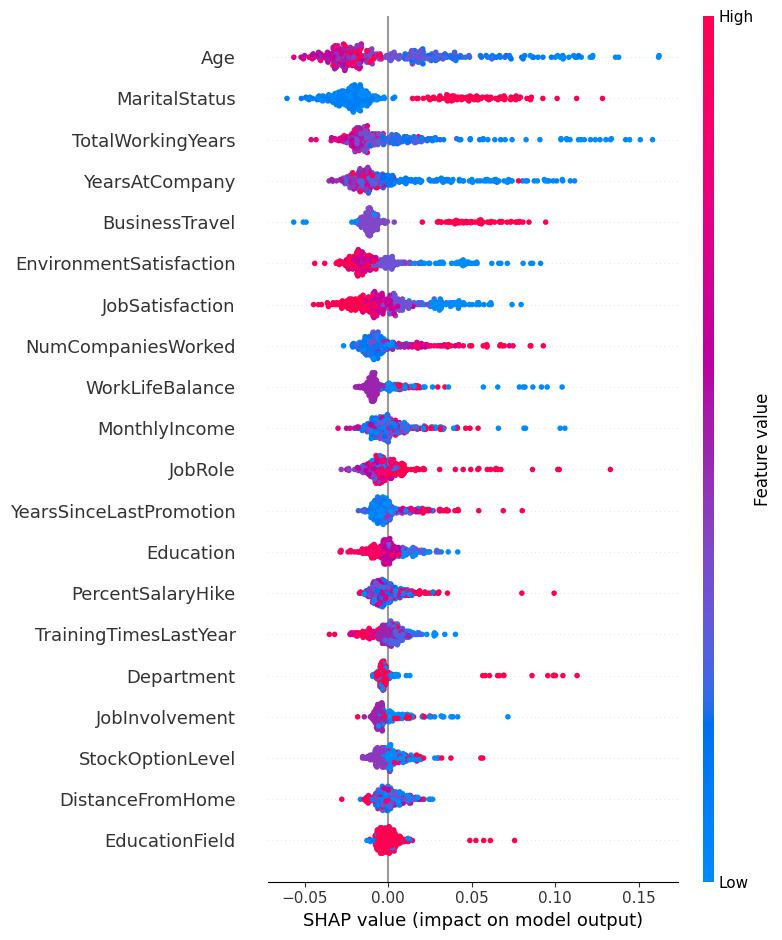

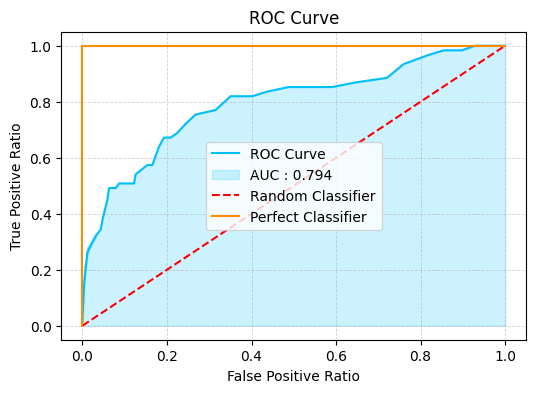

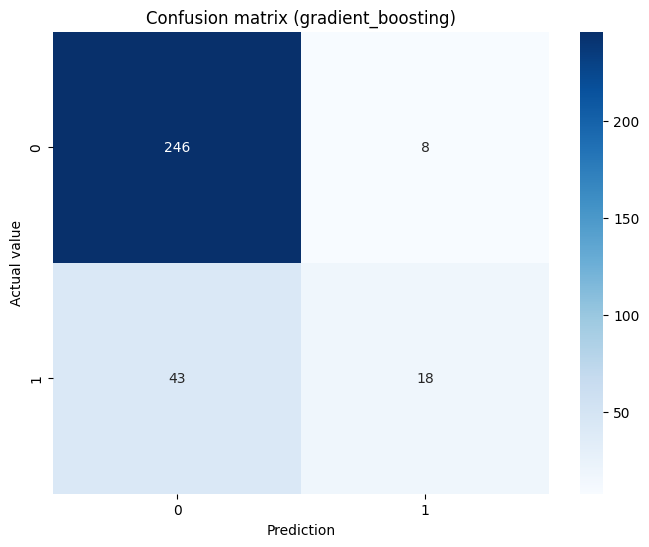

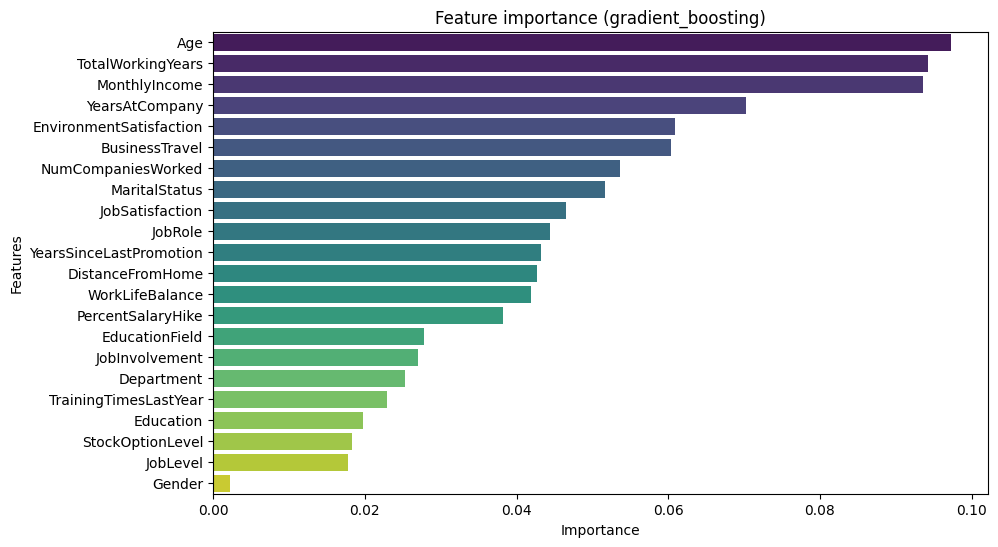

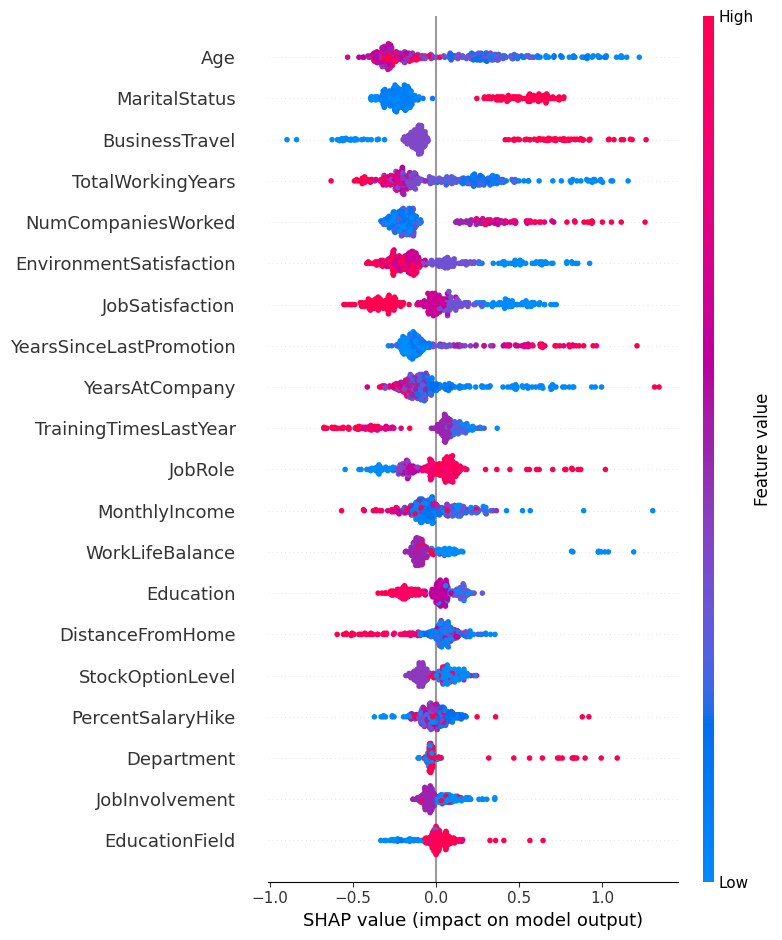

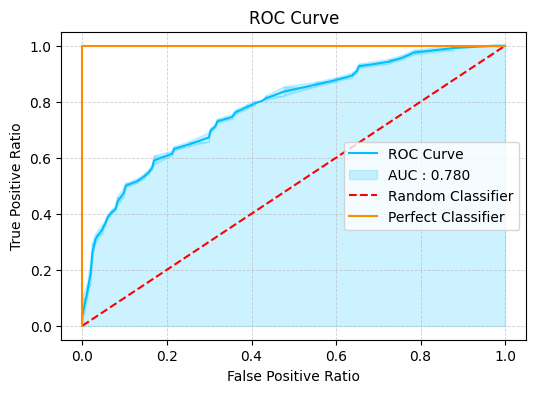

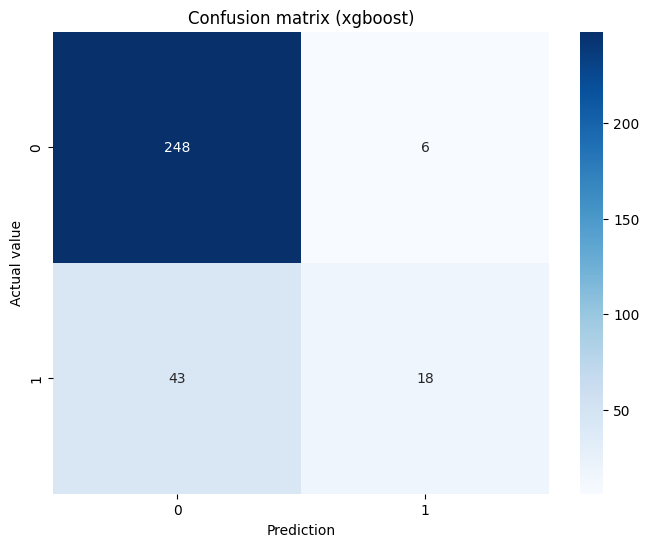

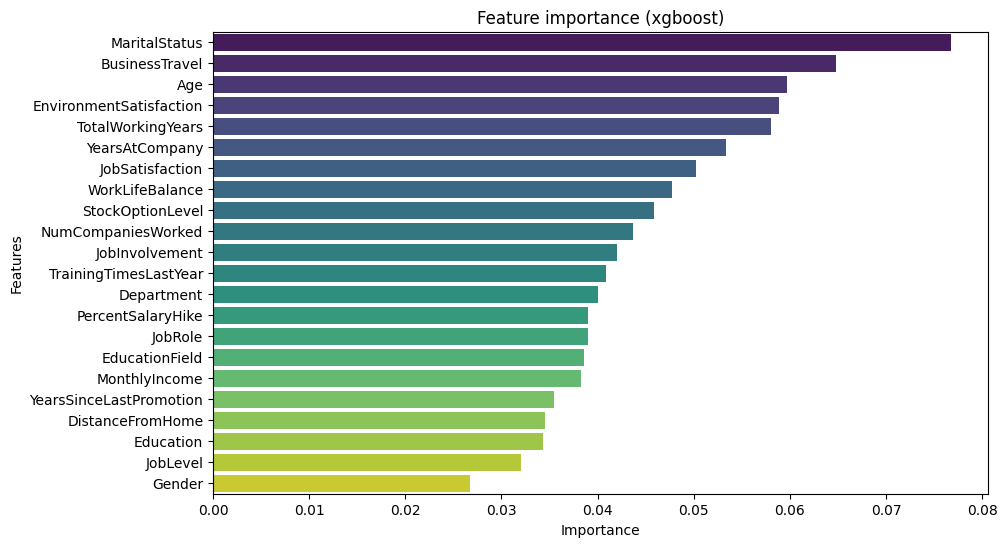

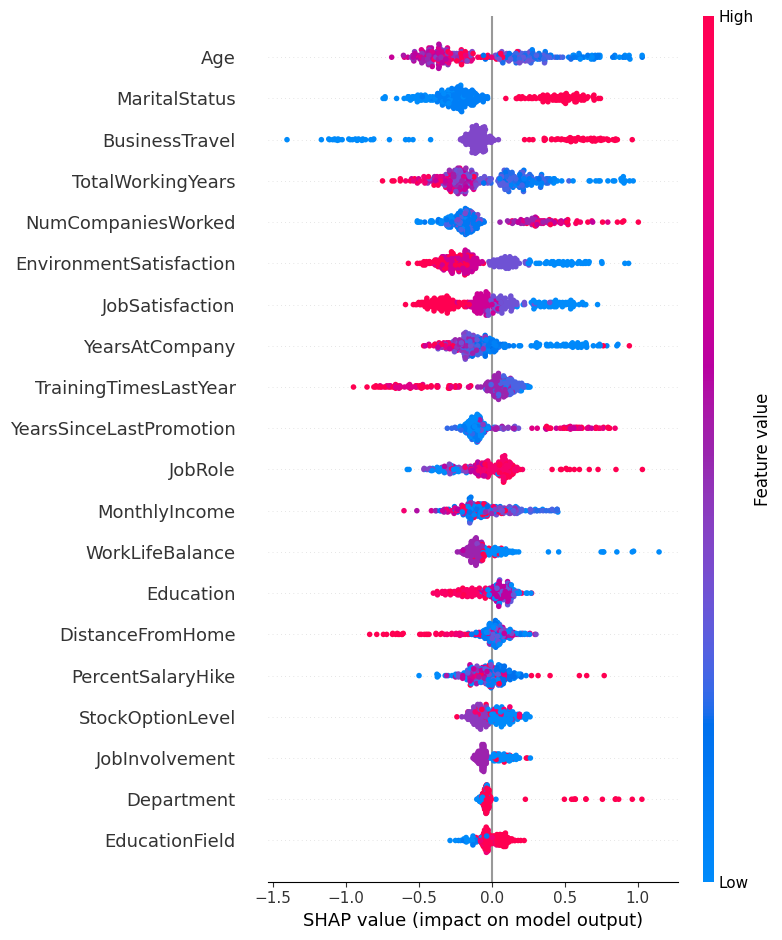

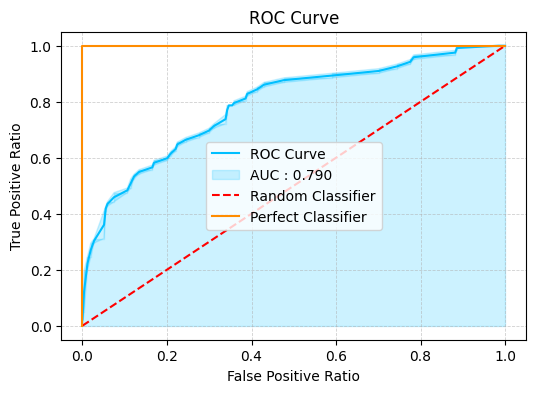

In [43]:
model_list = ["logistic_regression", "tree", "random_forest", "gradient_boosting", "xgboost"]
df_results_2 = pd.DataFrame()

for model in model_list:

    models_2.fit_model(model, file_name=f"{model}_2")
    models_2.plot_confusion_matrix(model)
    models_2.plot_predictors_importance(model)
    models_2.plot_shap_summary(model)
    df_current_results_2 = models_2.get_metrics(model)
    df_current_results_2["model"] = model
    df_results_2 = pd.concat([df_results_2, df_current_results_2], axis = 0)
    models_2.plot_roc_curve(model)

In [45]:
df_results_colors_2 = df_results_2.copy()
df_results_colors_2.reset_index(inplace = True, drop = True)
df_results_colors_2 = df_results_colors_2.style.apply(rows_colors_model, axis=1)
df_results_colors_2

,accuracy,precision,recall,f1,kappa,auc,time_seconds,cores,model
0,0.860095,0.838259,0.860095,0.819462,0.198361,0.791474,1.950668,nan,logistic_regression
1,0.815873,0.784007,0.815873,0.764104,0.158995,0.788305,1.950668,nan,logistic_regression
2,0.860095,0.846720,0.860095,0.813521,0.166643,0.699017,0.612723,11.000000,tree
3,0.819048,0.794405,0.819048,0.766276,0.166086,0.643572,0.612723,11.000000,tree
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,96.717018,nan,random_forest
5,0.844444,0.849043,0.844444,0.805319,0.307941,0.793888,96.717018,nan,random_forest
6,0.930048,0.933789,0.930048,0.921513,0.668561,0.968773,368.006836,11.000000,gradient_boosting
7,0.838095,0.820439,0.838095,0.810746,0.337061,0.780367,368.006836,11.000000,gradient_boosting
8,0.953895,0.955825,0.953895,0.950525,0.796496,0.991035,140.736148,nan,xgboost
9,0.844444,0.832436,0.844444,0.815869,0.352749,0.789919,140.736148,nan,xgboost


---